# Laboratory 1: The Solow Growth Model - Homework Solutions
#### Group Members:
- Akabi Bastiana (490334)
- Doliev Mekhroj (487990)
- Khudayberganov Asadbek (436840)
- Nomcoyiya Nomakhephu (488379)
- Wójcik Artur (394608)


### Part A: Plots
Plot the histogram of average growth rates between 1980 and 2010. 
Differentiate between developed, catching-up, and lagging behind countries.
Make sure the plot title, axis titles, and legend reflect the correct information.


In [1]:
# Import numerical computations library
import numpy as np

# Import dataframe management library
import pandas as pd

# Import statistics library
import statsmodels.api as sm

# Import statistics library, allows R-like regression syntax
import statsmodels.formula.api as smf

# Import plotting library
import matplotlib.pyplot as plt

In [2]:
# Restore old behavior of rounding default axis ranges
import matplotlib as mpl

mpl.rcParams['axes.autolimit_mode'] = 'round_numbers'
mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0

In [3]:
# Read dataset
pwt = pd.read_stata('data/pwt100.dta')

# Modify the dataset so that it is easier to work with

# Store country names and codes for later use
countries = pwt['country']
countries = countries.drop_duplicates()

countrycodes = pwt['countrycode']
countrycodes = countrycodes.drop_duplicates()

# Set MultiIndex (Index becomes country&year couple)
pwt.set_index(['country', 'year'], inplace=True)

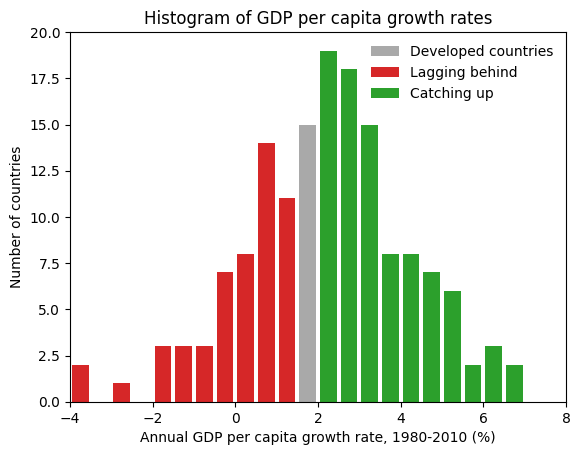

In [4]:
# Plot the histogram of average growth rates

year_start = 1980
year_end = 2010

x_start = pwt.xs(year_start, level='year')['rgdpe']/pwt.xs(year_start, level='year')['pop']

x_end = pwt.xs(year_end, level='year')['rgdpe']/pwt.xs(year_end, level='year')['pop']

# CAGR: Growth per year formula growth=(Value end/Value begin)^(1/t)-1
g = 100*((x_end/x_start)**(1/(year_end-year_start))-1)

g.head()

plt.hist(g.dropna(), np.arange(1.5, 2.5, 0.5), histtype='bar', rwidth=0.8, fc='darkgrey', label='Developed countries')
plt.hist(g.dropna(), np.arange(-10, 2, 0.5), histtype='bar', rwidth=0.8, fc='C3', label='Lagging behind')
plt.hist(g.dropna(), np.arange(2, 10, 0.5), histtype='bar', rwidth=0.8, fc='C2', label='Catching up')

plt.xlim(-4, 8)

plt.title('Histogram of GDP per capita growth rates')
plt.xlabel('Annual GDP per capita growth rate, 1980-2010 (%)')
plt.ylabel('Number of countries')

plt.legend(frameon=False)

plt.show()

### Part B: Solov Model
**Task 1**: Assume the following parameters for the country ABC:

\begin{align}
A = 1 \\
α = 1/3 \\
δ = 0.4 \\
n = 0.05 \\
s = 0.5 \\
\end{align}

Calculate the steady-state value of the capital per worker (only up to 4 decimal points). Assume that initial capital per worker is 0.25. Draw a plot by putting time (period) on x-axis and capital per worker on y-axis. Set maximum period to 50. Show the initial level of capital per worker, transition period, and steady-state level of capital per worker clearly.

**Important**: The following tasks are independent of each other!


$ Y_t = A K_t^{\alpha} L_t^{1-\alpha} $

$k_{t+1} = \frac{s A k_t^{\alpha} + (1 - \delta) k_t}{1 + n} $

$y^* = \left(\frac{sA}{n + \delta} \right)^{\frac{1}{1-\alpha}} $


Steady state level of capital per worker = 1.1712
Steady state reached at period: 31


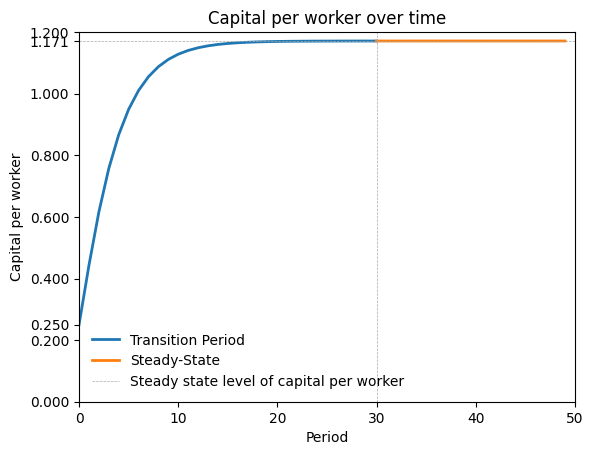

In [25]:
# Parameter values 
A = 1
α = 1/3
δ = 0.4
n = 0.05
s = 0.5

# Production function in intensive form
def f(k):
    return k**α


# Function for k_{t+1}
def k_next(k):
    return ( s*A*f(k) + (1-δ)*k ) / (1+n)

k_star = ((s*A)/(δ+n))**(1/(1-α))
print('Steady state level of capital per worker =', round(k_star,4))
# Plot k over time, assuming that k_0 < k_ss
T = 1+50
k_t = np.zeros(T)
k_0 = 0.25
k_t[0] = k_0

for t in range(T-1):
    k_t[t+1] = k_next(k_t[t])
    
for t in range(T):
    if round(k_star-k_t[t],4)==0:
        print("Steady state reached at period:", t)
        T_K_1 = t
        break

plt.plot(range(T_K_1),k_t[:T_K_1], lw=2, label='Transition Period')
plt.plot(range(T_K_1-1,T-1),k_t[T_K_1:], lw=2, label='Steady-State')

plt.hlines(round(k_star,4), 0, T-1, linestyle='dashed', lw=0.5, colors='darkgrey',label='Steady state level of capital per worker')

plt.vlines(T_K_1-1, 0, 1.2, linestyle='dashed', lw=0.5, colors='darkgrey')

plt.ylim(0, 1.2)
plt.yticks(list(plt.yticks()[0])+[k_t[0],k_t[T-1]])
plt.title('Capital per worker over time')
plt.xlabel('Period')
plt.ylabel('Capital per worker')
plt.legend(frameon=False)
plt.show()


**Task 2**: Assume now that country ABC is at steady-state and we are in period 30. After 10 years being at steady-state, suddenly people become more prudent and saving rate increased from 0.5 to 0.6 permanently in country ABC. Calculate the new steady-state level of capital per worker in the country ABC (only up to 4 decimal points). On the same plot you drew in Task 1, et maximum period to 100 and show the new steady-state level of capital per worker? Did it increase or decrease? Why? What is the economic intuition behind the change in steady-state level of capital per worker after an increase in saving rate?


Steady-state level of capital per worker = 1.1712
Steady-state reached at period: 31
New steady-state level of capital per worker = 1.5396
New steady-state reached at period: 67


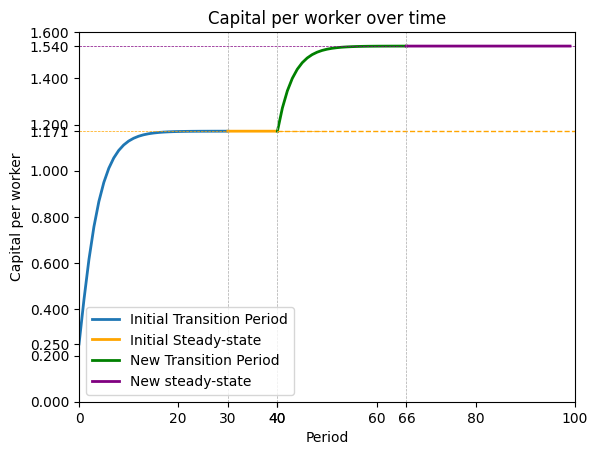

In [6]:
# Parameter values 
A = 1
α = 1/3
δ = 0.4
n = 0.05
s = 0.5

# Production function in intensive form
def f(k):
    return k**α


# Function for k_{t+1}
def k_next(k):
    return ( s*A*f(k) + (1-δ)*k ) / (1+n)

k_star = ((s*A)/(δ+n))**(1/(1-α))
print('Steady-state level of capital per worker =', round(k_star,4))
# Plot k over time, assuming that k_0 < k_ss
T = 1+50
k_t = np.zeros(T)
k_0 = 0.25
k_t[0] = k_0

for t in range(T-1):
    k_t[t+1] = k_next(k_t[t])
    
for t in range(T):
    if round(k_star-k_t[t],4)==0:
        print("Steady-state reached at period:", t)
        T_K_1 = t
        break
s_2 = 0.6
k_star_2 = ((s_2*A)/(δ+n))**(1/(1-α))
print('New steady-state level of capital per worker =', round(k_star_2,4))
def k_next_2(k):
    return ( s_2*A*f(k) + (1-δ)*k ) / (1+n)

T_2 = 1+100
k_t_2 = np.zeros(T_2)
k_40_2 = round(k_star,4)
for t in range(T_K_1+10):
    k_t_2[t]=k_t[t]
for t in range(T_K_1+10-1,T_2-1):
    k_t_2[t+1]=k_next_2(k_t_2[t])

for t in range(T_2):
    if round(k_star_2-k_t_2[t],4)==0:
        print("New steady-state reached at period:", t)
        T_K_2 = t
        break

plt.plot(range(T_K_1),k_t[:T_K_1], lw=2, label='Initial Transition Period')
plt.plot(range(T_K_1-1,T_K_1+10),k_t[T_K_1:T_K_1+10+1], lw=2, color='orange', label='Initial Steady-state')
plt.hlines(round(k_star,4), 0, T-1, linestyle='dashed', lw=0.5, colors='orange')
plt.plot(range(T_K_1+10-1,T_K_2),k_t_2[T_K_1+10-1:T_K_2], lw=2, color='green', label='New Transition Period')
plt.plot(range(T_K_2-1,T_2-1),k_t_2[T_K_2:T_2], lw=2,color='purple', label='New steady-state')


plt.hlines(round(k_star_2,4), 0, T_2-1, linestyle='dashed', lw=0.5, color='purple')
plt.hlines(round(k_star,4), T_K_1+10-1, T_2-1, linestyle='dashed', colors='orange', lw=1)
plt.vlines(T_K_1-1, 0, 1.6, linestyle='dashed', lw=0.5, colors='darkgrey')
plt.vlines(T_K_1+10-1, 0, 1.6, linestyle='dashed', lw=0.5, colors='darkgrey')
plt.vlines(T_K_2-1, 0, 1.6, linestyle='dashed', lw=0.5, colors='darkgrey')
plt.yticks(list(plt.yticks()[0])+[k_t[0],k_t[T-1],k_t_2[T_2-1]])
plt.xticks(list(plt.xticks()[0])+[T_K_1-1,T_K_1+10-1,T_K_2-1])
plt.title('Capital per worker over time')
plt.xlabel('Period')
plt.ylabel('Capital per worker')
plt.legend(frameon=True)
plt.show()

### TODO: Verify economic interpretation of the results

Increase in saving rate leads to increase in steady-state level of capital per worker. This is because higher saving rate means more resources are being allocated towards investment in capital, which in turn raises the capital stock per worker over time. As a result, the economy can produce more output per worker, leading to a higher steady-state level of capital per worker.

We can also observe this mathematically in steady-state output per worker formula:



\begin{align}
k^{*} &= \left( \frac{s \bar{A}}{\delta+n} \right)^{1/(1-\alpha)}
\end{align}

### TODO: Add information from "Optional - Analysis of Saving Rate" in the Lab1 instructions


**Task 3**: Assume now that country ABC is at initial steady-state you calculated in Task 1. After 10 years reaching steady-state, the war happens and country ABC loses 40% of its capital per worker. However, all parameter values are same as in Task 1 (saving rate is 0.5). Calculate the new steady-state level of capital per worker in the country ABC. On the same plot you drew in Task 1, set maximum period to 100 and show the new steady-state level of capital per worker? Did it increase or decrease or not change? Why or why not? Show the initial level of capital per worker, transition period, and steady-state level of capital per worker clearly.

Hint: you may want to benefit from the codes in the section after homeworks: Optional - Analysis of Saving Rate.

### TODO: Verify the following code cell if the plot is correct and add economic interpretation of the results

Steady-state level of capital per worker = 1.1712
Steady-state reached at period: 31
New steady-state level of capital per worker = 1.1712


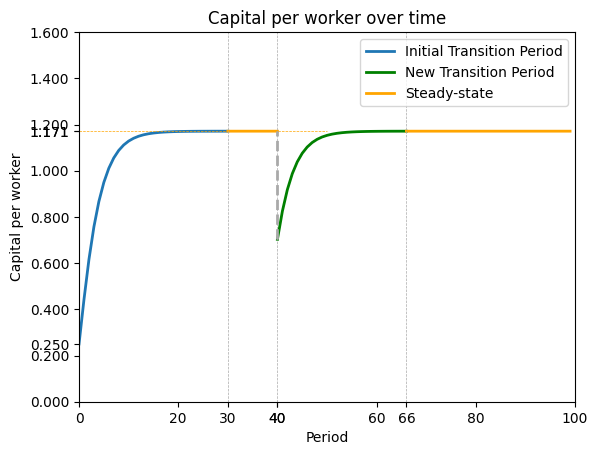

In [23]:
# Parameter values 
A = 1
α = 1/3
δ = 0.4
n = 0.05
s = 0.5

# Production function in intensive form
def f(k):
    return k**α


# Function for k_{t+1}
def k_next(k):
    return ( s*A*f(k) + (1-δ)*k ) / (1+n)

k_star = ((s*A)/(δ+n))**(1/(1-α))
print('Steady-state level of capital per worker =', round(k_star,4))
# Plot k over time, assuming that k_0 < k_ss
T = 1+50
k_t = np.zeros(T)
k_0 = 0.25
k_t[0] = k_0

for t in range(T-1):
    k_t[t+1] = k_next(k_t[t])
    
for t in range(T):
    if round(k_star-k_t[t],4)==0:
        print("Steady-state reached at period:", t)
        T_K_1 = t
        break

T_2 = 1+100
k_t_2 = np.zeros(T_2)
k_40_2 = round(k_star*0.6,4)

for t in range(T_K_1+10):
    k_t_2[t]=k_t[t]

k_t_2[40] = k_40_2
for t in range(T_K_1+10-1,T_2-1):
    k_t_2[t+1]=k_next(k_t_2[t])

for t in range(T_2):
    if round(k_star_2-k_t_2[t],4)==0:
        print("New steady-state reached at period:", t)
        T_K_2 = t
        break

k_star_2 = ((s*A)/(δ+n))**(1/(1-α))
print('New steady-state level of capital per worker =', round(k_star_2,4))

plt.plot(range(T_K_1),k_t[:T_K_1], lw=2, label='Initial Transition Period')
plt.plot(range(T_K_1-1,T_K_1+10),k_t[T_K_1:T_K_1+10+1], lw=2, color='orange')
plt.hlines(round(k_star,4), 0, T-1, linestyle='dashed', lw=0.5, colors='orange')
plt.plot(range(T_K_1+10-1,T_K_2),k_t_2[T_K_1+10-1:T_K_2], lw=2, color='green', label='New Transition Period')
plt.plot(range(T_K_2-1,T_2-1),k_t_2[T_K_2:T_2], lw=2,color='orange', label='Steady-state')


plt.vlines(T_K_1+10-1, 0, 1.6, linestyle='dashed', lw=0.5, colors='darkgrey')
plt.vlines(T_K_1-1, 0, 1.6, linestyle='dashed', lw=0.5, colors='darkgrey')
plt.vlines(T_K_1+10-1, k_40_2,k_star, linestyle='dashed', lw=2, colors='darkgrey')
plt.vlines(T_K_2-1, 0, 1.6, linestyle='dashed', lw=0.5, colors='darkgrey')
plt.yticks(list(plt.yticks()[0])+[k_t[0],k_t[T-1],k_t_2[T_2-1]])
plt.xticks(list(plt.xticks()[0])+[T_K_1-1,T_K_1+10-1,T_K_2-1])
plt.title('Capital per worker over time')
plt.xlabel('Period')
plt.ylabel('Capital per worker')
plt.legend(frameon=True)
plt.show()

### Part C: replication of MRW results using PWT 10.0

In [8]:
# Read in Mankiw, Romer and Weil (1992) data
mrw = pd.read_stata('data/MRW1992.dta')
mrw_countries = mrw['country']

# Construct replication dataset

# First detect countries from MRW that are absent in PWT
not_found = []

for i, country in enumerate(mrw_countries[mrw['N']==1]):
    try:
        temp = np.log(np.mean(pwt.loc[country]['csh_i']))
    except:
        not_found.append(country)

print(not_found)

['CentralAfr. Rep.', 'Congo, Peop. Rep.', 'Ivory Cost', 'Somalia', 'S. Africa', 'Tanzania', 'Zaire', 'Burma', 'Hong Kong', 'Korea, Rep. of', 'Syrian Arab Rep.', 'Germany, Fed. Rep.', 'Dominican Rep.', 'Trinidad & Tobago', 'Bolivia', 'Venezuela', 'Papua New Guinea']


In [9]:
# Construct a list of PWT-compatible country names (but still some countries are not covered by PWT)
not_found_PWT = ['Central African Republic', # 'CentralAfr. Rep.'
                 'Congo', # 'Congo, Peop. Rep.'
                 "Côte d'Ivoire", # 'Ivory Coast'
                 'South Africa', # 'S. Africa'
                 'U.R. of Tanzania: Mainland', # 'Tanzania'
                 'D.R. of the Congo', # 'Zaire'
                 'Myanmar', # 'Burma'
                 'China, Hong Kong SAR', # 'Hong Kong'
                 'Republic of Korea', # 'Korea, Rep.'
                 'Syrian Arab Republic', # 'Syrian Arab Rep.'
                 'Germany', # 'Germany, Fed. Rep.'
                 'Dominican Republic', # 'Dominican Rep.'
                 'Trinidad and Tobago', # 'Trinidad & Tobago'
                 'Bolivia (Plurinational State of)', # 'Bolivia'
                 'Venezuela (Bolivarian Republic of)'] # 'Venezuela'
                 
                 # 'Somalia' is missing from PWT 
                 # 'Papua New Guinea' is missing from PWT


In [24]:
mrw_pwt_countries = [n for n in mrw_countries[mrw['N']==1].tolist() if n not in not_found]
print(mrw_pwt_countries)
mrw_pwt_countries = mrw_pwt_countries + not_found_PWT
print(mrw_pwt_countries)
print(len(mrw_pwt_countries))

['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Chad', 'Egypt', 'Ethiopia', 'Ghana', 'Kenya', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone', 'Sudan', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe', 'Bangladesh', 'India', 'Israel', 'Japan', 'Jordan', 'Malaysia', 'Nepal', 'Pakistan', 'Philippines', 'Singapore', 'Sri Lanka', 'Thailand', 'Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Greece', 'Ireland', 'Italy', 'Netherlands', 'Norway', 'Portugal', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'Canada', 'Costa Rica', 'El Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'United States', 'Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Australia', 'Indonesia', 'New Zealand']
['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Camero

In [11]:
# Construct replication dataset based on observations for years 1985-2017
s = np.zeros(len(mrw_pwt_countries))
n = np.zeros(len(mrw_pwt_countries))
h = np.zeros(len(mrw_pwt_countries))
y_85 = np.zeros(len(mrw_pwt_countries))
y_17 = np.zeros(len(mrw_pwt_countries))

for i, country in enumerate(mrw_pwt_countries):
    s[i] = np.log(np.mean(pwt.loc[country]['csh_i'][35:]))
    n[i] = np.log(0.05+np.mean(pwt.loc[country]['emp'][35:].pct_change()))
    h[i] = np.mean(pwt.loc[country]['hc'][35:])
    y_85[i] = np.log(pwt.loc[country, 1985]['rgdpo']/pwt.loc[country, 1985]['emp'])
    y_17[i] = np.log(pwt.loc[country, 2017]['rgdpo']/pwt.loc[country, 2017]['emp'])

d = {'y_17': y_17, 'y_85': y_85, 's': s, 'δ_n_g': n, 's_h': np.log(np.log(h)*10)}
mrw_rep = pd.DataFrame(data=d, index=mrw_pwt_countries)
mrw_rep['y_17_85'] = mrw_rep['y_17'] - mrw_rep['y_85']
mrw_rep.head()

,y_17,y_85,s,δ_n_g,s_h,y_17_85
Algeria,10.673525,11.235086,-1.145871,-2.514745,1.838571,-0.561562
Angola,9.602782,8.652294,-1.065619,-2.503920,0.974068,0.950488
Benin,9.050662,8.656473,-1.878282,-2.508623,1.342471,0.394189
Botswana,10.601112,9.596834,-1.302101,-2.517723,2.186768,1.004278
Burkina Faso,8.637341,7.842568,-1.847810,-2.640430,0.072916,0.794774


**Task 1**: run an unrestricted estimation on the replication dataset of the human capital augmented Solow model,
with `y_17` as the dependent variable and `s`, `δ_n_g` and `s_h` as independent variables.
Comment on the coefficient signs and explanatory power of the model.

In [12]:

mrw_rep_h_results = smf.ols('y_17 ~ s + δ_n_g + s_h', data=mrw_rep).fit()
print(mrw_rep_h_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   y_17   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     71.61
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           7.21e-24
Time:                        17:59:46   Log-Likelihood:                -95.617
No. Observations:                  95   AIC:                             199.2
Df Residuals:                      91   BIC:                             209.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2195      1.539      2.743      0.0

Genreal output formula is:



We are estimating the following regression model:

$y_{17} = a_{0} + a_{1}\ln s_{k} + a_{2} \ln(δ+n+g) + a_{3} \ln s_{h} + ε$

Unrestricted estimation results:
| Variable | Model Component| Coefficient | Std. Error | t-Statistic | P-value |
|--------|----------|-------------|------------|-------------|---------|
| `s` | $\ln s_{k}$     | 0.9181     | 0.235    | 3.915        | 0.000  |
| `δ_n_g` | $\ln(δ+n+g)$    | -1.9200    | 0.574    | -3.343       | 0.001  |
| `s_h` | $\ln s_{h}$      | 1.1928     | 0.157    | 7.607        | 0.000  |

### TODO: Check economic interpretation of the results

The coefficients of the independent variables `s` and `s_h` are positive, indicating that higher savings rates and higher human capital investment are associated with higher output per worker.
Rise in savings rate leads to more capital accumulation $k_{t+1} = s y_t - (δ+n+g)k_t$ which in turn increases output per worker. 

Rise in human capital investment leads to a more skilled workforce, which enhances productivity and output per worker. As workers acquire more skills and knowledge, they can contribute more effectively to the production process, leading to higher output levels.

Negative coefficient of `δ_n_g` is expected from depreciation and population growth perspective. Higher depreciation rates reduce the effective capital stock available for production, leading to lower output per worker. Similarly, higher population growth rates can dilute the capital stock per worker, resulting in lower output levels. The technological growth rate `g` will aslo have a negative effect on output per worker in the short run, as it increases the required investment to maintain the same level of output per worker. 

The model has a good explanatory power, as indicated R-squared value of 0.702, suggesting that approximately 70.2% of the variability in output per capita can be explained by the independent variables in the model.

**Task 2**: run a restricted estimation on the replication dataset of the human capital augmented Solow model,
with `y_17` as the dependent variable, and appropriate restrictions as independent variables.
Comment on the implied values of $\alpha$ and $\beta$.

In [13]:
# Add in restrictions
mrw_rep['restricted'] = mrw_rep['s'] - mrw_rep['δ_n_g']
mrw_rep['restricted_h'] = mrw_rep['s_h'] - mrw_rep['δ_n_g']

# Run regressions with restrictions
mrw_rep_restricted_results = smf.ols('y_17 ~ restricted + restricted_h', data=mrw_rep).fit()
print(mrw_rep_restricted_results.summary())

α_β = ((mrw_rep_restricted_results.params[1]+mrw_rep_restricted_results.params[2])/
       (1+mrw_rep_restricted_results.params[1]+mrw_rep_restricted_results.params[2]))
print('Implied capital share α =', mrw_rep_restricted_results.params[1]*(1-α_β))
print('Implied human capital share β =', mrw_rep_restricted_results.params[2]*(1-α_β))

print('Test of restriction p-value =', mrw_rep_h_results.compare_f_test(mrw_rep_restricted_results)[1])

                            OLS Regression Results                            
Dep. Variable:                   y_17   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     108.5
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           6.34e-25
Time:                        17:59:46   Log-Likelihood:                -95.658
No. Observations:                  95   AIC:                             197.3
Df Residuals:                      92   BIC:                             205.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.8147      0.537      7.106   

C:\Users\aaa\AppData\Local\Temp\ipykernel_24140\643000234.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  α_β = ((mrw_rep_restricted_results.params[1]+mrw_rep_restricted_results.params[2])/
C:\Users\aaa\AppData\Local\Temp\ipykernel_24140\643000234.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (1+mrw_rep_restricted_results.params[1]+mrw_rep_restricted_results.params[2]))
C:\Users\aaa\AppData\Local\Temp\ipykernel_24140\643000234.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav


$ \frac{\alpha}{1-\alpha-\beta}+ \frac{\beta}{1-\alpha-\beta} = \frac{\alpha+\beta}{1-\alpha-\beta} $

$1 + \frac{\alpha+\beta}{1-\alpha-\beta} = \frac{1 - \alpha -\beta}{1 - \alpha -\beta}+\frac{\alpha+\beta}{1-\alpha-\beta} = \frac{1-\alpha-\beta+\alpha+\beta}{1-\alpha-\beta}= \frac{1}{1-\alpha-\beta} $

We are estimating the following regression model with restrictions:

$y_{17} = a_{0} + a_{1}(\ln s_{k} - \ln(δ+n+g)) + a_{2} (\ln s_{h}- \ln(δ+n+g)) + ε$

Estimation results:
| Variable | Model Component| Coefficient | Std. Error | t-Statistic | P-value |
|--------|----------|-------------|------------|-------------|---------|
| `restricted` | $\ln s_{k} - \ln(δ+n+g)$     | 0.8987     | 0.223    | 4.029        | 0.000  |
| `restricted_h` | $\ln s_{h} - \ln(δ+n+g)$    | 1.1753    | 0.143    | 8.212       | 0.000  |

This allows us to derive the implied values of $\alpha$ and $\beta$ from the coefficients of the restricted regression. The coefficient of `restricted` corresponds to $\frac{\alpha}{1-\alpha-\beta}$, and the coefficient of `restricted_h` corresponds to $\frac{\beta}{1-\alpha-\beta}$.


$\alpha \approx 0.2924$ and $\beta \approx 0.3823$


### TODO: Econimic interpretation of alpha and beta values

